Enter an integer (1, 2, or 3): 1
Original Image:


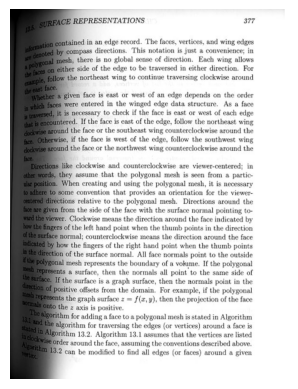

Cleaned Image:


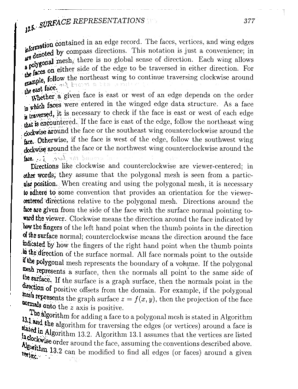

In [4]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

def display_image(image):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(image)
    plt.axis('off')
    plt.show()

def clean_gutters(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    thresh = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 11, 5)
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1, 1))
    cleaned = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)

    # Invert the color
    cleaned = cv2.bitwise_not(cleaned)

    # Color correction
    cleaned_rgb = cv2.cvtColor(cleaned, cv2.COLOR_GRAY2RGB)
    result = np.where(cleaned_rgb == 0, image, cleaned_rgb)

    # Enhance contrast and sharpness
    lab = cv2.cvtColor(result, cv2.COLOR_BGR2LAB)
    lab_planes = cv2.split(lab)
    clahe = cv2.createCLAHE(clipLimit=5.0, tileGridSize=(8, 8))
    lab_planes_list = list(lab_planes)
    lab_planes_list[0] = clahe.apply(lab_planes_list[0])
    lab_planes = tuple(lab_planes_list)
    lab = cv2.merge(lab_planes)
    enhanced = cv2.cvtColor(lab, cv2.COLOR_LAB2BGR)

    return enhanced

# Get user input
user_input = input("Enter an integer (1, 2, or 3): ")

# Define the image paths
image_paths = {
    '1': 'gutters1.JPG',
    '2': 'gutters2.JPG',
    '3': 'gutters3.JPG'
}

# Check if the input is valid
if user_input not in image_paths.keys():
    print("Invalid input. Please enter 1, 2, or 3.")
    exit()

# Get the selected image path
image_path = image_paths[user_input]

# Load the image
image = cv2.imread(image_path)

# Display the original image
print("Original Image:")
display_image(image)

# Clean the gutters
cleaned_image = clean_gutters(image)

# Display the cleaned image
print("Cleaned Image:")
display_image(cleaned_image)